In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file = "https://raw.githubusercontent.com/HacktiveMindset/House-Price-Prediction-System-Using-Data-Analytics-Algorithms/main/house_prices.csv.csv"

In [ ]:
df = pd.read_csv(file)
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [ ]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2915,2919.000000,2919,2919,2919.000000,2919.000000,2919.000000,2918,2918.000000,2918.000000,1460.000000
unique,NaN,NaN,5,NaN,5,5,NaN,NaN,NaN,15,NaN,NaN,NaN
top,NaN,NaN,RL,NaN,Inside,1Fam,NaN,NaN,NaN,VinylSd,NaN,NaN,NaN
freq,NaN,NaN,2265,NaN,2133,2425,NaN,NaN,NaN,1025,NaN,NaN,NaN
mean,1459.000000,57.137718,NaN,10168.114080,NaN,NaN,5.564577,1971.312778,1984.264474,NaN,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,NaN,7886.996359,NaN,NaN,1.113131,30.291442,20.894344,NaN,169.205611,440.766258,79442.502883
min,0.000000,20.000000,NaN,1300.000000,NaN,NaN,1.000000,1872.000000,1950.000000,NaN,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,NaN,7478.000000,NaN,NaN,5.000000,1953.500000,1965.000000,NaN,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,NaN,9453.000000,NaN,NaN,5.000000,1973.000000,1993.000000,NaN,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,NaN,11570.000000,NaN,NaN,6.000000,2001.000000,2004.000000,NaN,0.000000,1302.000000,214000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


For the Missing data, we can fill with mean for float, median for integer, and the mode for object. Although further exploration should be done.

Furthermore, we want to predict SalePrice and we can set the missing value to be the test set we can verify after training the model

In [ ]:
# filling categorical with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [ ]:
# filling numerical with median
numerical_columns = df.select_dtypes(include=['int64']).columns
numerical_columns = numerical_columns.drop('Id')
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())

In [ ]:
# filling float columns with mean, excluding the target (SalePrice)
float_columns = df.select_dtypes(include=['float64']).columns
float_columns = float_columns.drop('SalePrice')
for column in float_columns:
    df[column] = df[column].fillna(df[column].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2919 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2919 non-null   object 
 10  BsmtFinSF2    2919 non-null   float64
 11  TotalBsmtSF   2919 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
# drop the id column
df.drop(columns=['Id'], inplace = True)

For the **Numeric** columns, we'll apply **standardisation** and for **categorical** columns, we'll apply **one hot encoding**

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,60,11250,5,2001,2002,0.0,920.0,223500.0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,70,9550,5,1915,1970,0.0,756.0,140000.0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,NaN,False,False,...,True,False,False,False,False,False,False,False,False,False
2915,160,1894,5,1970,1970,0.0,546.0,NaN,False,False,...,True,False,False,False,False,False,False,False,False,False
2916,20,20000,7,1960,1996,0.0,1224.0,NaN,False,False,...,False,False,False,False,False,False,False,True,False,False
2917,85,10441,5,1992,1992,0.0,912.0,NaN,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
num_cols = numerical_columns.tolist() + float_columns.tolist()
num_cols.append('SalePrice')
num_cols

['MSSubClass',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'SalePrice']

In [ ]:
# create the train and validation set
train_df = df_encoded[df_encoded['SalePrice'].notna()].copy()
test_df = df_encoded[df_encoded['SalePrice'].isna()].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

#initialise the scaler
scaler = StandardScaler()
# fit the scaler with the data (i.e., find mean and std) then transform the training data
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

#then we just need to transform the test data
test_df[num_cols] = scaler.transform(test_df[num_cols])

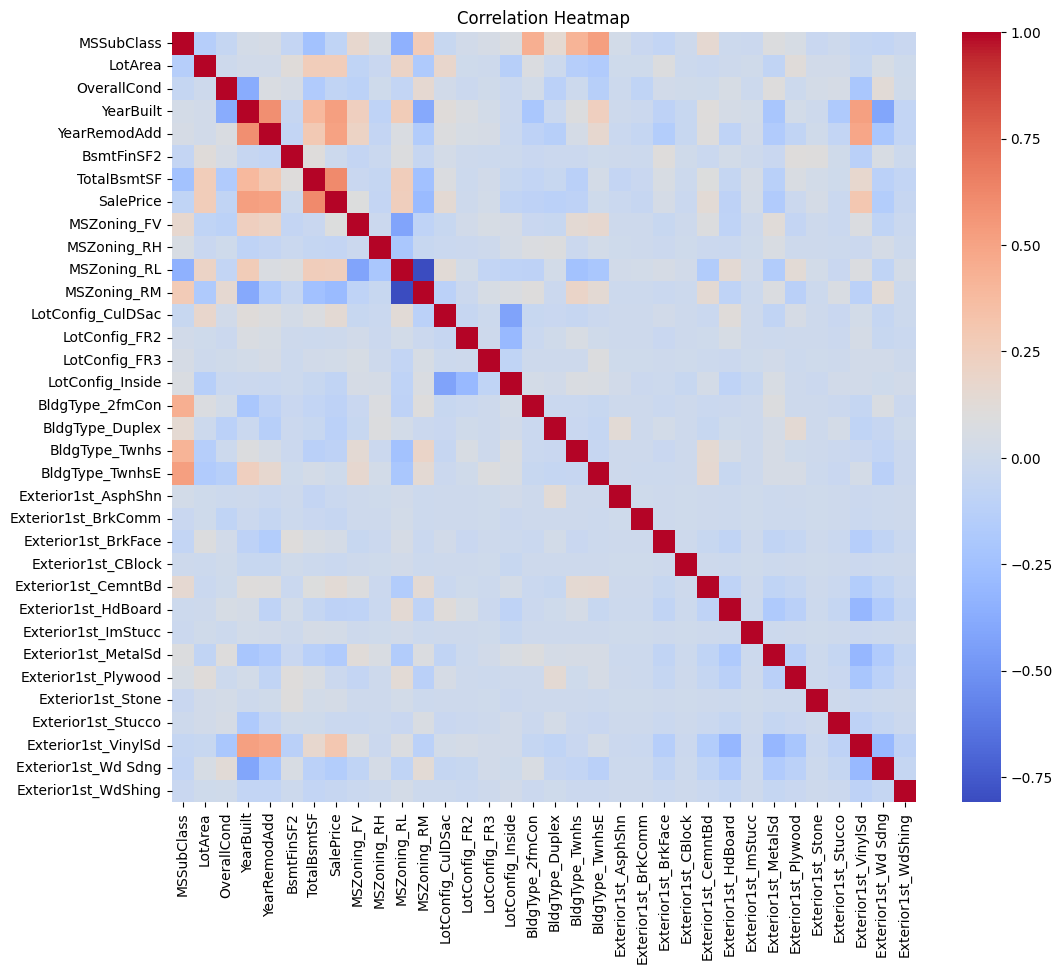

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

best practice: remove multi co-linearity (recommended topic to read about)

As we have (somewhat) preprocess the data, we can split the training and validation set.

<img src='https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png'>

In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# we will be testing several models here:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# linear regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


# ensemble models
# random forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# gradient boosting
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

GradientBoostingRegressor()

Please do read about hyperparameters

For resources regarding the model:
1. Statquest
2. Machine Learning Module
3. AI 1 (next semester if you're a CS student at UoB)

Now, we can evaluate the model using MAE and MSE

<img src = 'https://miro.medium.com/0*K-sNMSJUmG8lQIa5.png'>

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_lr = model_lr.predict(X_val)
print("Linear Regression - MAE:", mean_absolute_error(y_val, y_pred_lr))
print("Linear Regression - MSE:", mean_squared_error(y_val, y_pred_lr))

Linear Regression - MAE: 0.42967611931848154
Linear Regression - MSE: 0.4627486699593941


In [ ]:
y_pred_rf = model_rf.predict(X_val)
print("Random Forest - MAE:", mean_absolute_error(y_val, y_pred_rf))
print("Random Forest - MSE:", mean_squared_error(y_val, y_pred_rf))

Random Forest - MAE: 0.29529247208054876
Random Forest - MSE: 0.233658272558723


In [ ]:

y_pred_gb = model_gb.predict(X_val)
print("Gradient Boosting - MAE:", mean_absolute_error(y_val, y_pred_gb))
print("Gradient Boosting - MSE:", mean_squared_error(y_val, y_pred_gb))

Gradient Boosting - MAE: 0.2950749469328964
Gradient Boosting - MSE: 0.20291864318607808


## Messing Around with Deep Learning

In [ ]:
import cv2
import tensorflow as tf
import zipfile,os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Check for CUDA-enabled physical devices (GPUs)
cuda_devices = tf.config.list_physical_devices('GPU')
if cuda_devices:
    print("CUDA-enabled GPU is available")
    # Explicitly set the default device to the GPU
    tf.config.set_visible_devices(cuda_devices[0], 'GPU')
else:
    print("No CUDA-enabled GPU available, using CPU")

print("TensorFlow is using device:", tf.config.get_visible_devices())

CUDA-enabled GPU is available
TensorFlow is using device: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2025-11-04 14:50:05--  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/391417272/7eb836f2-695b-4a46-9c78-b65867166957?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-04T15%3A23%3A19Z&rscd=attachment%3B+filename%3Drockpaperscissors.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-04T14%3A22%3A39Z&ske=2025-11-04T15%3A23%3A19Z&sks=b&skv=2018-11-09&sig=OAVXRtpFCkS1B5KM9%2FOCdD61aNl5fzQf%2FWBPP6p0B70%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MjI3MTQwNiwibmJmIjoxNzYyMjY3ODA2LCJwYXRoIjoicmVsZWFzZWFzc2

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Setting base directory
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [ ]:
train_test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)

In [ ]:
train_generator = train_test_datagen.flow_from_directory(
        base_dir,
        subset='training',
        target_size=(150, 250), # set image to 150x250 pixels
        batch_size=16, # batch size 16, feel free to change this
        color_mode='grayscale',# reduce channel from RGB to grayscale -> computation efficiency
        class_mode='categorical' # ML task
        )

test_generator = train_test_datagen.flow_from_directory(
        base_dir,
        subset='validation',
        target_size=(150, 250),
        batch_size=16,
        color_mode='grayscale',
        class_mode='categorical'
        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


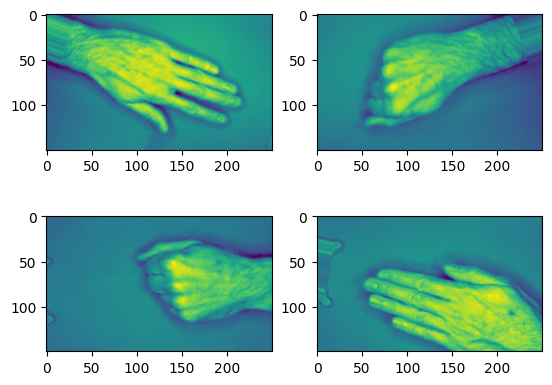

In [ ]:
plt.subplot(221)
plt.imshow(train_generator[0][0][0])
plt.subplot(222)
plt.imshow(train_generator[0][0][2])
plt.subplot(223)
plt.imshow(train_generator[0][0][5])
plt.subplot(224)
plt.imshow(train_generator[0][0][10])

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 250, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(216, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), # layer flatten untuk mengubah data agar dapat diproses dense layer
    tf.keras.layers.Dense(216, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The architecture of the model is similar to VGG-16

<img src = 'https://media.geeksforgeeks.org/wp-content/uploads/20200219152207/new41.jpg'>

Just with a twist of dimension and number of hidden layers

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 248, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 124, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 124, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 122, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 59, 216)    │       124,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 29, 216)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 106488)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 216)            │    23,001,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 216)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        13,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,159,155 (88.35 MB)

 Trainable params: 23,159,155 (88.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
        train_generator,
        epochs=15,
        validation_data=test_generator,
        verbose=1)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 25s 208ms/step - accuracy: 0.3177 - loss: 1.1778 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.3216 - loss: 1.0996 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.3541 - loss: 1.0987 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.3336 - loss: 1.0990 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.3304 - loss: 1.0994 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.3225 - loss: 1.0990 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.3403 - loss: 1.0993 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.3537 - loss: 1.1064 - val_accuracy: 0.343

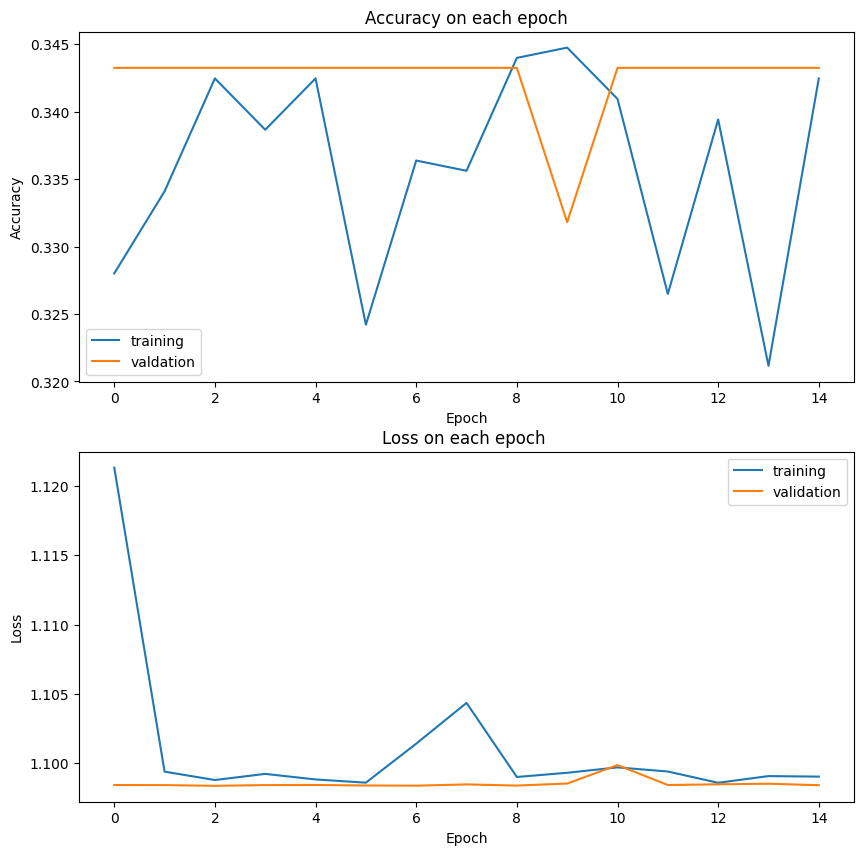

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig,ax=plt.subplots(2, figsize=(10,10))
ax[0].plot(train_accuracy)
ax[0].plot(val_accuracy)
ax[0].set_title('Accuracy on each epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['training', 'valdation'])

ax[1].plot(train_loss)
ax[1].plot(val_loss)
ax[1].set_title('Loss on each epoch ')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['training', 'validation'])

Image downloaded to /tmp/left_fist.png


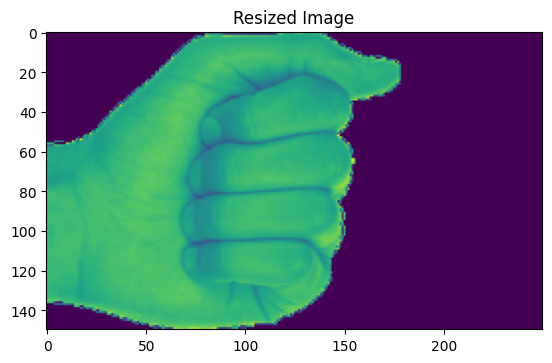

In [ ]:
import requests

# testing on new dataset
image_url = 'https://jenniferdewalt.com/images/left_fist.png'
image_path = '/tmp/left_fist.png'

response = requests.get(image_url)
if response.status_code == 200:
    with open(image_path, 'wb') as f:
        f.write(response.content)
    print(f"Image downloaded to {image_path}")

    hand = cv2.imread(image_path)

    if hand is not None:
        hand_resized = cv2.resize(hand, (250,150))
        hand_resized=cv2.cvtColor(hand_resized, cv2.COLOR_BGR2GRAY)
        plt.imshow(hand_resized)
        plt.title('Resized Image')
        plt.show()

        x = np.array(hand_resized)
        x = np.expand_dims(x, axis=0)
    else:
        print(f"Error: Could not load image from {image_path}")

else:
    print(f"Error: Could not download image from {image_url}. Status code: {response.status_code}")

In [ ]:
predict = model.predict(x)

if (np.argmax(predict[0]) == 0) :
    print("Rock")
elif (np.argmax(predict[0]) == 1) :
    print("Paper")
elif (np.argmax(predict[0]) == 2) :
    print("Scissor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step
Paper
